In [1]:
import numpy as np
import pandas as pd
import re

pd.set_option('display.max_colwidth', None)

In [2]:
with open('weibo_data.csv','r',encoding='utf-8') as f:
    weibo_data=pd.read_csv(f)

# 1. Preprocess dataset

In [3]:
#convert repost, comment, like to numeric
weibo_data=weibo_data.fillna(0)
weibo_data[['repost','comment','like']]=weibo_data[['repost','comment','like']].astype('int')
weibo_data

,name,time,content,repost,comment,like
0,Fee1lix,\n 03月30日 20:30\n,\n 海底捞科目三 LFee1lix的微博视频 ​,122,16,654
1,鲫鱼草草,\n 03月30日 19:49\n,\n 你们看con我看海底捞跳科目三 ​,0,0,0
2,芝士烤好了你要不要尝一下,\n 03月30日 19:26\n,\n 什么名字啊意思是你们歪果仁把科目三叫海底捞啊？更土了我崩溃了。 ​,0,0,0
3,脾气不好把你们全都砍死,\n 03月30日 19:01\n,\n 外网喊科目三叫海底捞challenge 笑死我了吗的 ​,0,0,0
4,一场冰雹-,\n 03月30日 18:49\n,\n 他们为什么把科目三叫成海底捞challenge啊啊啊啊啊啊神经病 ​,0,6,43
...,...,...,...,...,...,...
18162,我吃饭的时候不会饿wuuu,\n 2023年11月19日 00:34\n,\n 在海底捞听了一晚上的科目三 生日歌 分手快乐 ​,0,0,1
18163,11champagne,\n 2023年11月19日 00:29\n,\n 我想去海底捞跳科目三。。 ​,0,2,0
18164,木木是我的23333,\n 2023年11月19日 00:25\n,\n 刷了一晚上海底捞科目三，那哥们是真上头 ​,0,0,0
18165,5块糖,\n 2023年11月19日 00:20\n,\n 万万没想到在海底捞里看了十几遍科目三 ​,0,0,0


In [4]:
#check if there is empty post or not
weibo_data[['content','time']].isna().sum(axis=0)/len(weibo_data)*100

content    0.0
time       0.0
dtype: float64

In [5]:
#delete \n
weibo_data.replace(to_replace=r'\n',value='',regex=True,inplace=True)

In [6]:
#check if it works or not
weibo_data.head()

,name,time,content,repost,comment,like
0,Fee1lix,03月30日 20:30,海底捞科目三 LFee1lix的微博视频 ​,122,16,654
1,鲫鱼草草,03月30日 19:49,你们看con我看海底捞跳科目三 ​,0,0,0
2,芝士烤好了你要不要尝一下,03月30日 19:26,什么名字啊意思是你们歪果仁把科目三叫海底捞啊？更土了我崩溃了。 ​,0,0,0
3,脾气不好把你们全都砍死,03月30日 19:01,外网喊科目三叫海底捞challenge 笑死我了吗的 ​,0,0,0
4,一场冰雹-,03月30日 18:49,他们为什么把科目三叫成海底捞challenge啊啊啊啊啊啊神经病 ​,0,6,43


In [7]:
weibo_data['time']
d1=weibo_data['time'].str.contains('今天')
weibo_data=weibo_data[~d1]

In [8]:
#convert time to Time
date_parts = weibo_data['time'].str.split(r'\s+', expand=True)
date_parts[1] = date_parts[1].apply(lambda x: x if '2023年' in x else '2024年' + x)
weibo_data['time']=pd.to_datetime(date_parts[1]+''+date_parts[2],format='%Y年%m月%d日%H:%M')

weibo_data['Time']=pd.to_datetime(date_parts[1],format='%Y年%m月%d日')

/var/folders/xm/8t7yxztd5bz10pfxx8ck_wd80000gn/T/ipykernel_29993/2625345315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weibo_data['time']=pd.to_datetime(date_parts[1]+''+date_parts[2],format='%Y年%m月%d日%H:%M')
/var/folders/xm/8t7yxztd5bz10pfxx8ck_wd80000gn/T/ipykernel_29993/2625345315.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weibo_data['Time']=pd.to_datetime(date_parts[1],format='%Y年%m月%d日')


In [9]:
# Define a clean_text function
URL_REGEX = re.compile(
    r'(?i)((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>' + "，；、。！？（）《》【】" + ']+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’' + "，；、。！？（）《》【】" + ']))',
    re.IGNORECASE)
EMAIL_REGEX = re.compile(r"[-a-z0-9_.]+@(?:[-a-z0-9]+\.)+[a-z]{2,6}", re.IGNORECASE)
EMOJI_PATTERN = re.compile("["u"\U0001F600-\U0001F64F"u"\U0001F300-\U0001F5FF"u"\U0001F680-\U0001F6FF"u"\U0001F1E0-\U0001F1FF"u"\U00002702-\U000027B0" "]+", flags=re.UNICODE)
ALL_PUNCS = re.compile(
    r"[，\_《。》、？；：‘’＂“”【「】」·！@￥…（）—\,\<\.\>\/\?\;\:\'\"\[\]\{\}\~\`\!\@\#\$\%\^\&\*\(\)\-\=\+]")

def clean_text(text):
    if len(text) > 150:
        return ''
    if '海底捞'not in text and '科目三' not in text:
        return ''
    
    text = text.split('L')[0]
    text = text.split(' 2')[0]
    text = text.split(' 收起d')[0]
    
    text = re.sub(URL_REGEX, "", text)
    text = re.sub(EMAIL_REGEX, "", text)
    text = re.sub(r"(回复)?(//)?\s*@\S*?\s*(:|：| |$)", " ", text)
    text = EMOJI_PATTERN.sub(r'', text)
    #text = re.sub(r"#\S+#", "", text)
    text = re.sub(r"#\S[^#]*#", "", text)
    text = text.replace("\n", " ")
    text = re.sub(r"(\s)+", r"\1", text)
    text = re.sub(ALL_PUNCS, "", text)
    
    return text.strip()

In [10]:
weibo_data['clean_content']=weibo_data['content'].apply(lambda x: clean_text(x))

/var/folders/xm/8t7yxztd5bz10pfxx8ck_wd80000gn/T/ipykernel_29993/4021872592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weibo_data['clean_content']=weibo_data['content'].apply(lambda x: clean_text(x))


In [11]:
#delete duplicated value and keep first value
weibo_data.sort_values(by='time',inplace=True)
weibo_data.drop_duplicates(subset='clean_content',keep='first',inplace=True)
weibo_data.dropna(inplace=True)

/var/folders/xm/8t7yxztd5bz10pfxx8ck_wd80000gn/T/ipykernel_29993/988906731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weibo_data.sort_values(by='time',inplace=True)
/var/folders/xm/8t7yxztd5bz10pfxx8ck_wd80000gn/T/ipykernel_29993/988906731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weibo_data.drop_duplicates(subset='clean_content',keep='first',inplace=True)
/var/folders/xm/8t7yxztd5bz10pfxx8ck_wd80000gn/T/ipykernel_29993/988906731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [12]:
weibo_data['clean_content']

18166                        啊啊啊爱上了海底捞科目三 ​
18165                  万万没想到在海底捞里看了十几遍科目三 ​
18164                  刷了一晚上海底捞科目三那哥们是真上头 ​
18163                          我想去海底捞跳科目三 ​
18162              在海底捞听了一晚上的科目三 生日歌 分手快乐 ​
                        ...                
5                       海底捞在放程艾影变脸科目三也看到了 ​
4        他们为什么把科目三叫成海底捞challenge啊啊啊啊啊啊神经病 ​
3              外网喊科目三叫海底捞challenge 笑死我了吗的 ​
2           什么名字啊意思是你们歪果仁把科目三叫海底捞啊更土了我崩溃了 ​
1                         你们看con我看海底捞跳科目三 ​
Name: clean_content, Length: 13178, dtype: object

## 2. Using Baidu API to proceed sentiment analysis

In [13]:
import requests
import json
import pandas as pd

API_KEY = "im7WPpspeZB8MWuRRow6uR6o"
SECRET_KEY = "NZJbfT6YJKzoyzinvTjFGm7Lj1id5exS"

def get_access_token():
    """
    Use API key and secret key to generate access token.
    :return: access_token, or None if an error occurs
    """
    url = "https://aip.baidubce.com/oauth/2.0/token"
    params = {"grant_type": "client_credentials", "client_id": API_KEY, "client_secret": SECRET_KEY}
    try:
        response = requests.post(url, params=params)
        response.raise_for_status()  # Raise an error for bad status codes
        return response.json().get("access_token")
    except requests.exceptions.RequestException as e:
        print("An error occurred while retrieving access token:", e)
        return None

def analyze_sentiment(text, access_token):
    """
    Send a text to the sentiment analysis API and return the result.
    :param text: The text to analyze
    :param access_token: The access token for the API
    :return: The sentiment analysis result
    """
    url = f"https://aip.baidubce.com/rpc/2.0/nlp/v1/sentiment_classify?charset=UTF-8&access_token={access_token}"
    payload = json.dumps({"text": text})
    headers = {
        'Content-Type': 'application/json',
        'Accept': 'application/json'
    }
    try:
        response = requests.post(url, headers=headers, data=payload)
        response.raise_for_status()  # Raise an error for bad status codes
        return response.json()
    except requests.exceptions.RequestException as e:
        print("An error occurred while analyzing sentiment:", e)
        return None

def main(output_csv):
    # Get the access token
    access_token = get_access_token()
    if not access_token:
        print("Failed to retrieve access token")
        return
    
    # Ensure there's a column named 'clean_content' in the DataFrame
    if 'clean_content' not in weibo_data.columns:
        print("DataFrame must contain a 'clean_content' column")
        return

    # Analyze sentiment for each text entry and collect results
    sentiments = weibo_data['clean_content'].apply(lambda text: analyze_sentiment(text, access_token) if pd.notnull(text) else {"error": "No content"})
    
    # Add results to the DataFrame
    weibo_data['sentiment_analysis'] = sentiments

    # Save the DataFrame to a new CSV file
    weibo_data.to_csv(output_csv, index=False)

if __name__ == '__main__':
    output_csv = 'output.csv'  # Replace with your output CSV file path
    main(output_csv)

An error occurred while analyzing sentiment: HTTPSConnectionPool(host='aip.baidubce.com', port=443): Max retries exceeded with url: /rpc/2.0/nlp/v1/sentiment_classify?charset=UTF-8&access_token=24.28243ecd1d4099a93dce6c5e5588acbc.2592000.1721647342.282335-85754190 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x1316d5f90>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
An error occurred while analyzing sentiment: HTTPSConnectionPool(host='aip.baidubce.com', port=443): Max retries exceeded with url: /rpc/2.0/nlp/v1/sentiment_classify?charset=UTF-8&access_token=24.28243ecd1d4099a93dce6c5e5588acbc.2592000.1721647342.282335-85754190 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x131689cd0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
An error occurred while analyzing sentiment: HTTPSConnectionPool(host='aip.baidubce.com', port=4

/var/folders/xm/8t7yxztd5bz10pfxx8ck_wd80000gn/T/ipykernel_5575/3011864172.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weibo_data['sentiment_analysis'] = sentiments


## 3. Data analysis

### 3.1 parsing sentiment analysis

In [47]:
# Function to parse the sentiment_analysis JSON string
def parse_sentiment_analysis(data):
    try:
        sentiment_data = data['items'][0]
        return pd.Series({
            'confidence': sentiment_data.get('confidence'),
            'negative_prob': sentiment_data.get('negative_prob'),
            'positive_prob': sentiment_data.get('positive_prob'),
            'sentiment': sentiment_data.get('sentiment')
        })
    except (TypeError, KeyError, IndexError) as e:
        return pd.Series({'confidence': None, 'negative_prob': None, 'positive_prob': None, 'sentiment': None})

# Apply the parsing function to the sentiment_analysis column
weibo_data[['confidence', 'negative_prob', 'positive_prob', 'sentiment']] = weibo_data['sentiment_analysis'].apply(parse_sentiment_analysis)

# Check the resulting DataFrame
print(weibo_data.head())

                name                time  \
18166          不叫三岁了 2023-11-19 00:20:00   
18165            5块糖 2023-11-19 00:20:00   
18164     木木是我的23333 2023-11-19 00:25:00   
18163    11champagne 2023-11-19 00:29:00   
18162  我吃饭的时候不会饿wuuu 2023-11-19 00:34:00   

                                                            content  repost  \
18166                                啊啊啊爱上了海底捞科目三 ​                       0   
18165                          万万没想到在海底捞里看了十几遍科目三 ​                       0   
18164                         刷了一晚上海底捞科目三，那哥们是真上头 ​                       0   
18163                                我想去海底捞跳科目三。。 ​                       0   
18162                      在海底捞听了一晚上的科目三 生日歌 分手快乐 ​                       0   

       comment  like       Time             clean_content  \
18166        4     0 2023-11-19            啊啊啊爱上了海底捞科目三 ​   
18165        0     0 2023-11-19      万万没想到在海底捞里看了十几遍科目三 ​   
18164        0     0 2023-11-19      刷了一晚上海底捞科目三那哥们是真上头 ​   
18163        2  

/var/folders/xm/8t7yxztd5bz10pfxx8ck_wd80000gn/T/ipykernel_5575/718751626.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weibo_data[['confidence', 'negative_prob', 'positive_prob', 'sentiment']] = weibo_data['sentiment_analysis'].apply(parse_sentiment_analysis)


In [138]:
Positive_posts=weibo_data[weibo_data['sentiment'] == 2.0]
Negative_posts=weibo_data[weibo_data['sentiment'] == 0.0]

Positive_posts.to_csv('Positive_posts.csv', index=False, encoding='utf-8-sig')
Negative_posts.to_csv('Negative_posts.csv', index=False, encoding='utf-8-sig')

In [139]:
Positive_content=Positive_posts[['clean_content']]
Negative_content=Negative_posts[['clean_content']]

Positive_content.to_csv('Positive_content.csv', index=False, encoding='utf-8-sig')
Negative_content.to_csv('Negative_content.csv', index=False, encoding='utf-8-sig')

### Sentiment Distribution Analysis

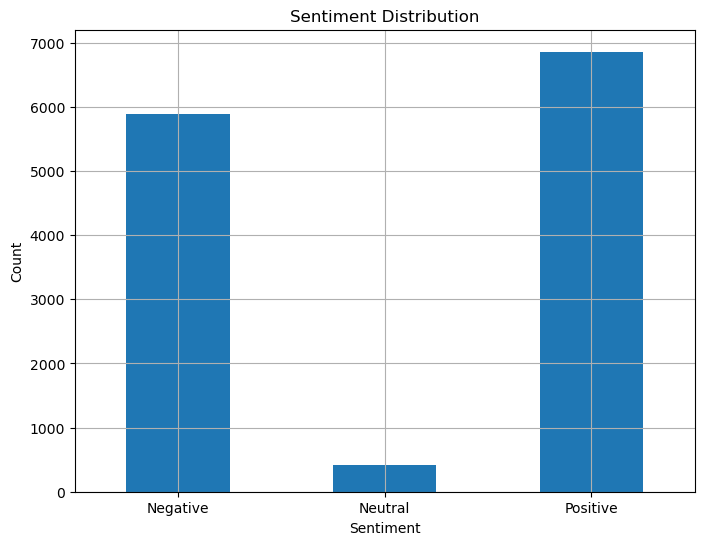

In [127]:
import matplotlib.pyplot as plt

custom_labels = {0: 'Negative', 1.0: 'Neutral', 2.0: 'Positive'}

# Plot the distribution of sentiment
plt.figure(figsize=(8, 6))
weibo_data['sentiment'].value_counts().sort_index().plot(kind='bar')

plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()),rotation=0)

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(True)
    
plt.show()